<a href="https://colab.research.google.com/github/FrnNardes/Human-Activity-Recognition-Using-Smartphones/blob/main/Human_Activity_Recognition_Using_Smartphones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human Activity Recognition Using Smartphones
Nesse algoritmo, iremos utilizar k-means para analisar o dataset "Human Activity Recognition Using Smartphones", agrupando as atividades humanas registradas e fazer uma análise exploratória dos resultados.


## **1. Importando as bibliotecas e o DataSet**


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix

# 1. Acesso ao Conjunto de Dados
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"
dataset_path = "./UCI_HAR_Dataset.zip"

# Baixar e extrair os dados
def download_and_extract_data():
    import os
    import zipfile
    import urllib.request

    if not os.path.exists(dataset_path):
        print("Baixando o dataset...")
        urllib.request.urlretrieve(data_url, dataset_path)

    if not os.path.exists("UCI HAR Dataset"):
        print("Extraindo os dados...")
        with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
            zip_ref.extractall(".")

download_and_extract_data()

## **2. Carregando os dados**

In [172]:
feature_names_path = "UCI HAR Dataset/features.txt"
x_train_path = "UCI HAR Dataset/train/X_train.txt"
x_test_path = "UCI HAR Dataset/test/X_test.txt"
y_train_path = "UCI HAR Dataset/train/y_train.txt"
y_test_path = "UCI HAR Dataset/test/y_test.txt"

def load_x_data(data_path):
    print("Carregando dados...")
    features = pd.read_csv(feature_names_path, sep='\s+', header=None, names=["index", "feature"])
    features = features["feature"].values

    data = pd.read_csv(data_path, sep='\s+', header=None)
    data.columns = features

    return data

def load_y_data(data_path):
    data = pd.read_csv(data_path, sep='\s+', header=None, names=["activity_id"])
    data.columns = ['Activity']

    return data


x_train = load_x_data(x_train_path)
x_test = load_x_data(x_test_path)
y_train = load_y_data(y_train_path)
y_test = load_y_data(y_test_path)

activity_mapping = {
       'WALKING': 1,
       'WALKING_UPSTAIRS': 2,
       'WALKING_DOWNSTAIRS': 3,
       'SITTING': 4,
       'STANDING': 5,
       'LAYING': 6
   }

y_train_numeric = y_train['Activity'].map(activity_mapping)
y_test_numeric = y_test['Activity'].map(activity_mapping)

Carregando dados...
Carregando dados...


## **3. Analise exploratória dos dados**

In [173]:
def exploratory_analysis(data):
    print("Dimensão: ", data.shape)

    print("\nDados Nulos:", data.isnull().sum().sum())

    print("\nLinhas duplicadas:", data.duplicated().any())

    print("\nColunas duplicadas :", len(duplicated_columns))

    print("-------------------------------------------------")

print("x_train")
exploratory_analysis(x_train)
print("x_test")
exploratory_analysis(x_test)

x_train
Dimensão:  (7352, 561)

Dados Nulos: 0

Linhas duplicadas: False

Colunas duplicadas : 21
-------------------------------------------------
x_test
Dimensão:  (2947, 561)

Dados Nulos: 0

Linhas duplicadas: False

Colunas duplicadas : 21
-------------------------------------------------


In [174]:
# Removendo as colunas duplicadas
def remove_duplicated_columns(data):
    duplicated_columns = data.columns[data.T.duplicated()].tolist()
    data = data.drop(duplicated_columns, axis=1)
    return data

x_train = remove_duplicated_columns(x_train)
x_test = remove_duplicated_columns(x_test)

print(x_train.shape)
print(x_test.shape)

(7352, 540)
(2947, 540)


(7352, 1)
(2947, 1)


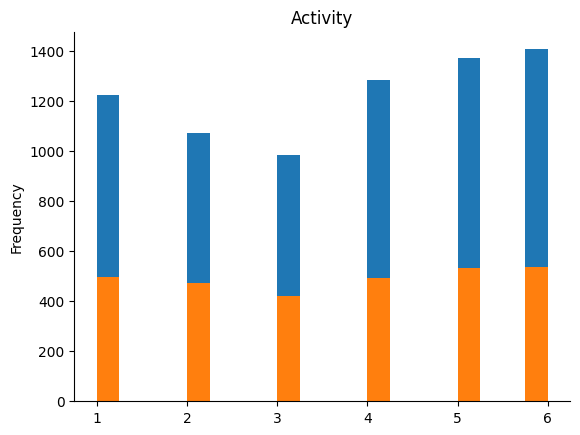

In [175]:
print(y_train.shape)
print(y_test.shape)

y_train['Activity'].plot(kind='hist', bins=20, title='Activity')
plt.gca().spines[['top', 'right',]].set_visible(False)
y_test['Activity'].plot(kind='hist', bins=20, title='Activity')
plt.gca().spines[['top', 'right',]].set_visible(False)

## **4. Pré-processamento**

In [176]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## **5. Reduzir dimensionalidade para visualização**

In [177]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

## **6. Aplicando o K-Means**

In [178]:
def apply_kmeans(data, k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data)
    return clusters, kmeans

k = 6  # Escolhido com base nas 6 atividades (1 WALKING, 2 WALKING_UPSTAIRS, 3 WALKING_DOWNSTAIRS, 4 SITTING, 5 STANDING, 6 LAYING)
clusters_train, kmeans_model = apply_kmeans(x_train_pca, k)
clusters_test = kmeans_model.predict(x_test_pca)

## **7.  Visualização dos Clusters**

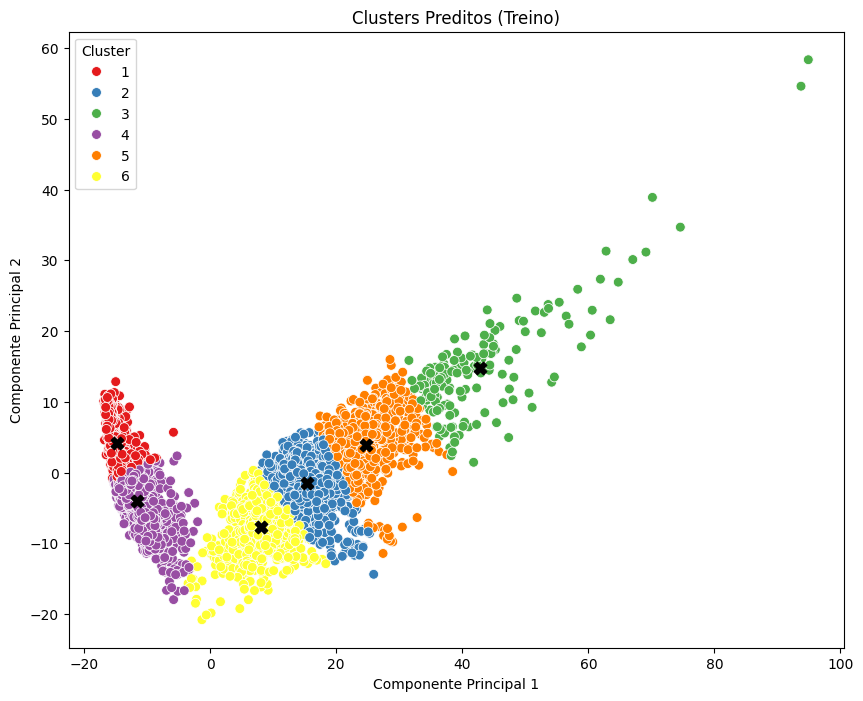

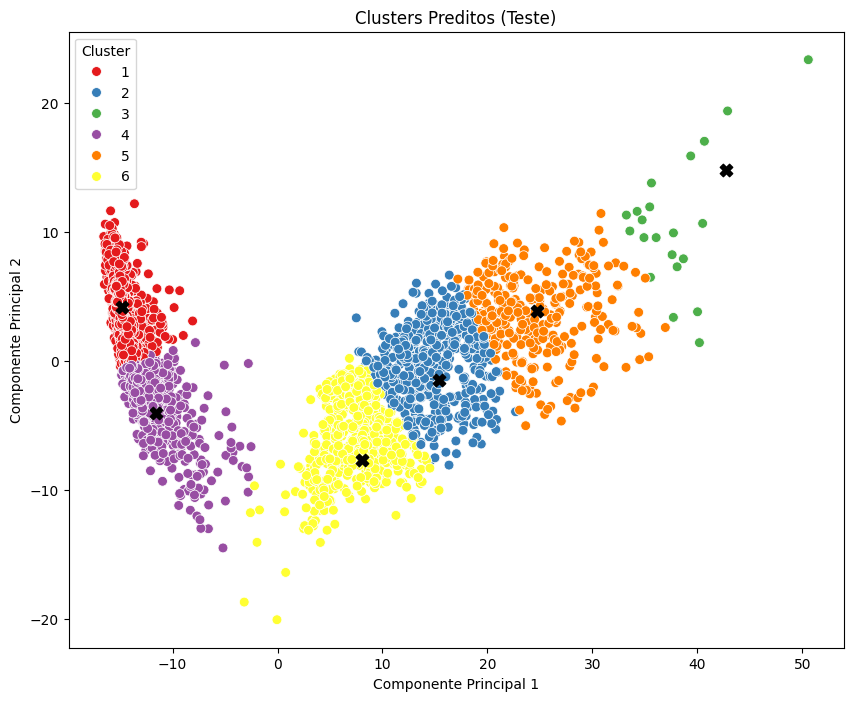

In [179]:
def visualize_clusters(data, clusters, title):
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=clusters + 1, palette="Set1", s=50)
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=80, c='black', marker='X')
    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title="Cluster")
    plt.show()

visualize_clusters(x_train_pca, clusters_train, "Clusters Preditos (Treino)")
visualize_clusters(x_test_pca, clusters_test, "Clusters Preditos (Teste)")

In [182]:
ss = silhouette_score(x_train_pca, clusters_train)
print(f"Silhouette Score: {ss}")

Silhouette Score: 0.47507389456507904
